In [1]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_jobs=pd.read_csv('./job_all_three_web.csv')
df_jobs.drop('Unnamed: 0',axis=1,inplace=True)
df_jobs.drop('comp_description',axis=1,inplace=True)

In [3]:
df_jobs.shape

(595, 16)

In [4]:
df_jobs.country_code=df_jobs.country_code.map(lambda x: 'SG' if str(x)=='nan' else x)

In [5]:
df_jobs.sal_currency_code=df_jobs.sal_currency_code.map(lambda x: 'SGD' if str(x)=='nan' else x)

In [6]:
df_jobs.fillna('None',inplace=True)

In [7]:
df_jobs.job_description_all_indeed=df_jobs.job_description_all_indeed.map(lambda x: '' if x=='None' else x)
df_jobs.job_description_all_future=df_jobs.job_description_all_future.map(lambda x: '' if x=='None' else x)
df_jobs.job_description=df_jobs.job_description.map(lambda x: '' if x=='None' else x)

In [8]:
df_jobs.job_title=df_jobs.job_title.map(lambda x:x.lower())

In [9]:
df_jobs['job_description_concat']=df_jobs.job_description_all_indeed+df_jobs.job_description_all_future+df_jobs.job_description

In [10]:
df_jobs.drop(['job_description_all_indeed','job_description_all_future','job_description'],axis=1,inplace=True)

In [11]:
vect_job_cat = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1,6),max_features=200000)

In [12]:
vect_job_cat.fit(df_jobs.job_category.values)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=200000, min_df=1,
        ngram_range=(1, 6), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
job_cat_list=vect_job_cat.get_feature_names()

In [14]:
for ind in df_jobs[df_jobs.job_category=='None'].index:
    df_jobs.job_category.loc[ind]= list(np.unique([x for x in TextBlob(df_jobs['job_description_concat'][ind]).words if x in job_cat_list]))

In [15]:
vect_comp_tagline = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1,6),max_features=20000)

In [16]:
vect_comp_tagline.fit(df_jobs.comp_tagline.values)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=1,
        ngram_range=(1, 6), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [17]:
comp_tagline_list = vect_comp_tagline.get_feature_names()

In [18]:
for ind in df_jobs[df_jobs.comp_tagline=='None'].index:
    df_jobs.comp_tagline.loc[ind]= list(np.unique([x for x in TextBlob(df_jobs['job_description_concat'][ind]).words if x in comp_tagline_list]))

In [19]:
vect_job_seniority=CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1,6),max_features=20000)

In [20]:
vect_job_seniority.fit(df_jobs.job_seniority.values)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=1,
        ngram_range=(1, 6), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [21]:
job_seniority_list = vect_job_seniority.get_feature_names()

In [22]:
for ind in df_jobs[df_jobs.job_seniority=='None'].index:
    df_jobs.job_seniority.loc[ind]= list(np.unique([x for x in TextBlob(df_jobs.job_title[ind]+df_jobs.job_description_concat[ind]).words if x in job_seniority_list]))

In [23]:
vect_skills_future=CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1,6),max_features=20000)

In [24]:
vect_skills_future.fit(df_jobs.skills_future.values)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=1,
        ngram_range=(1, 6), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [25]:
skills_future_list = vect_skills_future.get_feature_names()

In [26]:
for ind in df_jobs[df_jobs.skills_future=='None'].index:
    df_jobs.skills_future.loc[ind]= list(np.unique([x for x in TextBlob(df_jobs.job_description_concat[ind]).words if x in skills_future_list]))

In [27]:
df_job_no_sal=df_jobs[(df_jobs.job_max_salary=='None')&(df_jobs.job_min_salary=='None')]

In [28]:
df_job_no_sal

,comp_name,comp_tagline,country_code,job_category,job_max_salary,job_min_salary,job_sal_mode,job_seniority,job_title,job_type,min_year_exp,sal_currency_code,skills_future,job_description_concat
219,accountant-general's department,"[analytics, application, best, business, capab...",SG,"accounting / auditing / taxation, public / civ...",None,None,None,[management],head (data architect),full time,None,SGD,"['business analysis', 'project management', 'm...","['head (data architect)', 'to architect, desig..."
222,ministry of manpower,"[ability, agency, analytics, best, build, busi...",SG,public / civil service,None,None,None,manager,"senior assistant director, survey design and a...",full time,None,SGD,"['leadership', 'military', 'military operation...","['role purpose', 'to design, plan, co-ordinate..."
231,brink's singapore pte ltd,"[activities, analytics, business, communicatio...",SG,"admin / secretarial, consulting , banking and ...",None,None,None,manager,business process manager,full time,None,SGD,"['process improvement', 'business process', 'b...","[""brink's singapore is a wholly owned subsidia..."
239,national car rentals (private) limited,[],SG,others,None,None,None,"senior management, middle management, manager","licensee manager, asia",full time,None,SGD,"['management', 'leadership', 'project manageme...",[None][None][None][None]
241,ministry of home affairs,"[analytics, application, automation, best, bet...",SG,"information technology, public / civil service",None,None,None,fresh/entry level,mha science & technology associate programme,full time,None,SGD,"['security', 'information security', 'network ...","['mha s&t associate programme', 'the ministry ..."
243,laminaar aviation infotech pte. ltd.,"[achieve, activities, analytics, based, compan...",SG,information technology,None,None,None,senior management,chief innovation officer,full time,None,SGD,"['project planning', 'management', 'strategic ...",[None]['adopt the latest and new technology in...
249,bluechip platforms asia pte. ltd.,"[ability, analytics, banking, business, data, ...",SG,"risk management, banking and finance, legal",None,None,None,manager,regulatory compliance manager - fintech,full time,None,SGD,"['risk management', 'management', 'leadership'...","['our client is a fintech start up, which has ..."
250,bluechip platforms asia pte. ltd.,"[analytics, bank, banking, based, communicatio...",SG,"accounting / auditing / taxation, banking and ...",None,None,None,professional,"senior avp, private banking audit",full time,None,SGD,"['auditing', 'accounting', 'financial reportin...","[""an international bank is looking to hire an ..."
253,company undisclosed,"[achieve, activities, analytics, capabilities,...",SG,"others, purchasing / merchandising, sciences /...",None,None,None,"senior management, middle management",head of procurement,full time,None,SGD,"['procurement', 'supply chain management', 'st...","['responsibilities ', '\xa0']['establish, enha..."
273,ministry of manpower,"[analytics, communication, data, develop, engi...",SG,public / civil service,None,None,None,"[manager, senior]","manager / senior manager, compliance strategy...",full time,None,SGD,"['analytics', 'data analysis', 'analysis', 'st...",['the job holder is responsible for using anal...


In [29]:
df_job_sal=df_jobs[~((df_jobs.job_max_salary=='None')&(df_jobs.job_min_salary=='None'))].copy()

In [30]:
df_job_sal.reset_index(inplace=True,drop=True)

In [31]:
for ind in range(217,len(df_job_sal)):
    print(ind)
    print(df_job_sal.job_min_salary[ind])
    print(df_job_sal.job_max_salary[ind])
    print('-'*40)    

217
$8,300
$15,000
----------------------------------------
218
$12,000
$21,600
----------------------------------------
219
$6,000
$7,400
----------------------------------------
220
$6,000
$12,000
----------------------------------------
221
$4,000
$6,000
----------------------------------------
222
$12,000
$18,000
----------------------------------------
223
$5,200
$8,000
----------------------------------------
224
$6,000
$12,000
----------------------------------------
225
$4,000
$7,000
----------------------------------------
226
$2,800
$3,500
----------------------------------------
227
$2,500
$3,300
----------------------------------------
228
$4,000
$8,000
----------------------------------------
229
$7,000
$14,000
----------------------------------------
230
$7,000
$14,000
----------------------------------------
231
$7,000
$14,000
----------------------------------------
232
$6,500
$15,000
----------------------------------------
233
$13,000
$17,000
-------------------------

In [32]:
'''
df_job_sal.job_min_salary[237] = '$7,000'
df_job_sal.job_max_salary[237] = '$12,000'
df_job_sal.job_min_salary[264] = '$4,000'
df_job_sal.job_max_salary[264] = '$8,000'
df_job_sal.job_min_salary[415] = '$3,500'
df_job_sal.job_max_salary[415] = '$5,000'
df_job_sal.job_min_salary[429] = '$14,000'
df_job_sal.job_max_salary[429] = '$17,000'
df_job_sal.job_min_salary[478] = '$2,000'
df_job_sal.job_max_salary[478] = '$4,000'
df_job_sal.job_min_salary[496] = '$2,800'
df_job_sal.job_max_salary[496] = '$2,800'
df_job_sal.job_min_salary[503] = '$70,000'
df_job_sal.job_max_salary[503] = '$120,000'
df_job_sal.job_min_salary[523] = '$5,000'
df_job_sal.job_max_salary[523] = '$7,000'
'''
df_job_sal.job_min_salary[237] = '$7,000'
df_job_sal.job_max_salary[237] = '$12,000'
df_job_sal.job_min_salary[264] = '$4,000'
df_job_sal.job_max_salary[264] = '$8,000'
df_job_sal.job_min_salary[300] = '$5,000'
df_job_sal.job_max_salary[300] = '$9,000'
df_job_sal.job_min_salary[415] = '$3,500'
df_job_sal.job_max_salary[415] = '$5,000'
df_job_sal.job_min_salary[429] = '$14,000'
df_job_sal.job_max_salary[429] = '$17,000'
df_job_sal.job_min_salary[478] = '$2,000'
df_job_sal.job_max_salary[478] = '$4,000'
df_job_sal.job_min_salary[496] = '$2,800'
df_job_sal.job_max_salary[496] = '$2,800'
df_job_sal.job_min_salary[503] = '$70,000'
df_job_sal.job_max_salary[503] = '$120,000'
df_job_sal.job_min_salary[523] = '$5,000'
df_job_sal.job_max_salary[523] = '$7,000'

In [33]:
df_job_sal.job_min_salary=df_job_sal.job_min_salary.map(lambda x:float(x.replace('$','').replace(',','')))

In [34]:
df_job_sal.job_max_salary=df_job_sal.job_max_salary.map(lambda x:x.replace('$','').replace(',',''))

In [35]:
df_job_sal[df_job_sal.job_min_salary==1600].groupby(['job_min_salary','job_max_salary']).count()

comp_name  comp_tagline  country_code  \
job_min_salary job_max_salary                                          
1600.0         1800.0                  1             1             1   
               None                    1             1             1   

                               job_category  job_sal_mode  job_seniority  \
job_min_salary job_max_salary                                              
1600.0         1800.0                     1             1              1   
               None                       1             1              1   

                               job_title  job_type  min_year_exp  \
job_min_salary job_max_salary                                      
1600.0         1800.0                  1         1             1   
               None                    1         1             1   

                               sal_currency_code  skills_future  \
job_min_salary job_max_salary                                     
1600.0         1800.0                          1              1   
               None                            1              1   

                               job_description_concat  
job_min_salary job_max_salary                          
1600.0         1800.0                               1  
               None                                 1

In [36]:
df_job_sal[(df_job_sal.job_min_salary==1600)&(df_job_sal.job_max_salary=='None')].job_max_salary.index

Int64Index([201], dtype='int64')

In [37]:
df_job_sal.job_max_salary.loc[201]=1800

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
df_job_sal[df_job_sal.job_min_salary==1500].groupby(['job_min_salary','job_max_salary']).count()

comp_name  comp_tagline  country_code  \
job_min_salary job_max_salary                                          
1500.0         2000                    1             1             1   
               2000.0                  1             1             1   
               None                    1             1             1   

                               job_category  job_sal_mode  job_seniority  \
job_min_salary job_max_salary                                              
1500.0         2000                       1             1              1   
               2000.0                     1             1              1   
               None                       1             1              1   

                               job_title  job_type  min_year_exp  \
job_min_salary job_max_salary                                      
1500.0         2000                    1         1             1   
               2000.0                  1         1             1   
               None                    1         1             1   

                               sal_currency_code  skills_future  \
job_min_salary job_max_salary                                     
1500.0         2000                            1              1   
               2000.0                          1              1   
               None                            1              1   

                               job_description_concat  
job_min_salary job_max_salary                          
1500.0         2000                                 1  
               2000.0                               1  
               None                                 1

In [39]:
df_job_sal[(df_job_sal.job_min_salary==1500)&(df_job_sal.job_max_salary=='None')].job_max_salary.index

Int64Index([209], dtype='int64')

In [40]:
df_job_sal.job_max_salary.loc[209]=2000

In [41]:
df_job_sal[df_job_sal.job_min_salary==2800].groupby(['job_min_salary','job_max_salary']).count()

comp_name  comp_tagline  country_code  \
job_min_salary job_max_salary                                          
2800.0         2800                    1             1             1   
               3500                    1             1             1   
               3500.0                  2             2             2   
               4000.0                  1             1             1   
               5600                    1             1             1   
               None                    1             1             1   

                               job_category  job_sal_mode  job_seniority  \
job_min_salary job_max_salary                                              
2800.0         2800                       1             1              1   
               3500                       1             1              1   
               3500.0                     2             2              2   
               4000.0                     1             1              1   
               5600                       1             1              1   
               None                       1             1              1   

                               job_title  job_type  min_year_exp  \
job_min_salary job_max_salary                                      
2800.0         2800                    1         1             1   
               3500                    1         1             1   
               3500.0                  2         2             2   
               4000.0                  1         1             1   
               5600                    1         1             1   
               None                    1         1             1   

                               sal_currency_code  skills_future  \
job_min_salary job_max_salary                                     
2800.0         2800                            1              1   
               3500                            1              1   
               3500.0                          2              2   
               4000.0                          1              1   
               5600                            1              1   
               None                            1              1   

                               job_description_concat  
job_min_salary job_max_salary                          
2800.0         2800                                 1  
               3500                                 1  
               3500.0                               2  
               4000.0                               1  
               5600                                 1  
               None                                 1

In [42]:
df_job_sal[(df_job_sal.job_min_salary==2800)&(df_job_sal.job_max_salary=='None')].job_max_salary.index

Int64Index([202], dtype='int64')

In [43]:
(3500*2+4000)/3

3666.6666666666665

In [44]:
df_job_sal.job_max_salary.loc[202]=3667

In [45]:
df_job_sal[df_job_sal.job_min_salary==5000].groupby(['job_min_salary','job_max_salary']).count()

comp_name  comp_tagline  country_code  \
job_min_salary job_max_salary                                          
5000.0         10000                   6             6             6   
               10000.0                 2             2             2   
               5200.0                  1             1             1   
               5500                    1             1             1   
               6000                    2             2             2   
               6000.0                  2             2             2   
               6500                    1             1             1   
               6500.0                  4             4             4   
               6800                    1             1             1   
               7000                    5             5             5   
               7000.0                  4             4             4   
               8000                   11            11            11   
               8000.0                  5             5             5   
               9000                    2             2             2   
               None                    1             1             1   

                               job_category  job_sal_mode  job_seniority  \
job_min_salary job_max_salary                                              
5000.0         10000                      6             6              6   
               10000.0                    2             2              2   
               5200.0                     1             1              1   
               5500                       1             1              1   
               6000                       2             2              2   
               6000.0                     2             2              2   
               6500                       1             1              1   
               6500.0                     4             4              4   
               6800                       1             1              1   
               7000                       5             5              5   
               7000.0                     4             4              4   
               8000                      11            11             11   
               8000.0                     5             5              5   
               9000                       2             2              2   
               None                       1             1              1   

                               job_title  job_type  min_year_exp  \
job_min_salary job_max_salary                                      
5000.0         10000                   6         6             6   
               10000.0                 2         2             2   
               5200.0                  1         1             1   
               5500                    1         1             1   
               6000                    2         2             2   
               6000.0                  2         2             2   
               6500                    1         1             1   
               6500.0                  4         4             4   
               6800                    1         1             1   
               7000                    5         5             5   
               7000.0                  4         4             4   
               8000                   11        11            11   
               8000.0                  5         5             5   
               9000                    2         2             2   
               None                    1         1             1   

                               sal_currency_code  skills_future  \
job_min_salary job_max_salary                                     
5000.0         10000                           6              6   
               10000.0                         2              2   
               5200.0                          1              1   
               5500  

In [46]:
df_job_sal[(df_job_sal.job_min_salary==5000)&(df_job_sal.job_max_salary=='None')].job_max_salary.index

Int64Index([204], dtype='int64')

In [47]:
(10000*2+5200+6000*2+6500*4+7000*4+8000*5)/18

7288.888888888889

In [48]:
df_job_sal.job_max_salary.loc[204]=7289

In [49]:
df_job_sal[df_job_sal.job_min_salary==2000].groupby(['job_min_salary','job_max_salary']).count()

comp_name  comp_tagline  country_code  \
job_min_salary job_max_salary                                          
2000.0         2500                    1             1             1   
               2500.0                  3             3             3   
               2600                    1             1             1   
               3000                    4             4             4   
               3300                    1             1             1   
               4000                    2             2             2   
               4000.0                  1             1             1   
               4500                    1             1             1   
               5000.0                  1             1             1   
               6000.0                  1             1             1   
               None                    1             1             1   

                               job_category  job_sal_mode  job_seniority  \
job_min_salary job_max_salary                                              
2000.0         2500                       1             1              1   
               2500.0                     3             3              3   
               2600                       1             1              1   
               3000                       4             4              4   
               3300                       1             1              1   
               4000                       2             2              2   
               4000.0                     1             1              1   
               4500                       1             1              1   
               5000.0                     1             1              1   
               6000.0                     1             1              1   
               None                       1             1              1   

                               job_title  job_type  min_year_exp  \
job_min_salary job_max_salary                                      
2000.0         2500                    1         1             1   
               2500.0                  3         3             3   
               2600                    1         1             1   
               3000                    4         4             4   
               3300                    1         1             1   
               4000                    2         2             2   
               4000.0                  1         1             1   
               4500                    1         1             1   
               5000.0                  1         1             1   
               6000.0                  1         1             1   
               None                    1         1             1   

                               sal_currency_code  skills_future  \
job_min_salary job_max_salary                                     
2000.0         2500                            1              1   
               2500.0                          3              3   
               2600                            1              1   
               3000                            4              4   
               3300                            1              1   
               4000                            2              2   
               4000.0                          1              1   
               4500                            1              1   
               5000.0                          1              1   
               6000.0                          1              1   
               None                            1              1   

                               job_description_concat  
job_min_salary job_max_salary                          
2000.0         2500                                 1  
               2500.0                               3  
               2600                                 1  
               3000                                 4  
            

In [50]:
df_job_sal[(df_job_sal.job_min_salary==2000)&(df_job_sal.job_max_salary=='None')].job_max_salary.index

Int64Index([210], dtype='int64')

In [51]:
(2500*3+4000+5000+6000)/6

3750.0

In [52]:
df_job_sal.job_max_salary.loc[210]=3750

In [53]:
df_job_sal[df_job_sal.job_min_salary==3000].groupby(['job_min_salary','job_max_salary']).count()

comp_name  comp_tagline  country_code  \
job_min_salary job_max_salary                                          
3000.0         3500                    1             1             1   
               4000.0                  3             3             3   
               4050.0                  1             1             1   
               4500                    2             2             2   
               4500.0                  1             1             1   
               5000                    3             3             3   
               5000.0                  2             2             2   
               6000                    6             6             6   
               6000.0                  1             1             1   
               8000.0                  2             2             2   
               9000                    1             1             1   
               None                    1             1             1   

                               job_category  job_sal_mode  job_seniority  \
job_min_salary job_max_salary                                              
3000.0         3500                       1             1              1   
               4000.0                     3             3              3   
               4050.0                     1             1              1   
               4500                       2             2              2   
               4500.0                     1             1              1   
               5000                       3             3              3   
               5000.0                     2             2              2   
               6000                       6             6              6   
               6000.0                     1             1              1   
               8000.0                     2             2              2   
               9000                       1             1              1   
               None                       1             1              1   

                               job_title  job_type  min_year_exp  \
job_min_salary job_max_salary                                      
3000.0         3500                    1         1             1   
               4000.0                  3         3             3   
               4050.0                  1         1             1   
               4500                    2         2             2   
               4500.0                  1         1             1   
               5000                    3         3             3   
               5000.0                  2         2             2   
               6000                    6         6             6   
               6000.0                  1         1             1   
               8000.0                  2         2             2   
               9000                    1         1             1   
               None                    1         1             1   

                               sal_currency_code  skills_future  \
job_min_salary job_max_salary                                     
3000.0         3500                            1              1   
               4000.0                          3              3   
               4050.0                          1              1   
               4500                            2              2   
               4500.0                          1              1   
               5000                            3              3   
               5000.0                          2              2   
               6000                            6              6   
               6000.0                          1              1   
               8000.0                          2              2   
               9000                            1              1   
               None                            1              1   

                               job_description_concat  
job_min_s

In [54]:
df_job_sal[(df_job_sal.job_min_salary==3000)&(df_job_sal.job_max_salary=='None')].job_max_salary.index

Int64Index([211], dtype='int64')

In [55]:
(4000*3+4050+4500+5000*2+6000+8000*2)/10

5255.0

In [56]:
df_job_sal.job_max_salary.loc[211]=5255

In [57]:
df_job_sal[df_job_sal.job_min_salary==8000].groupby(['job_min_salary','job_max_salary']).count()

comp_name  comp_tagline  country_code  \
job_min_salary job_max_salary                                          
8000.0         10000                   2             2             2   
               12000                   3             3             3   
               12000.0                 1             1             1   
               15000                   2             2             2   
               16000                   4             4             4   
               17000.0                 1             1             1   
               9000.0                  2             2             2   
               None                    1             1             1   

                               job_category  job_sal_mode  job_seniority  \
job_min_salary job_max_salary                                              
8000.0         10000                      2             2              2   
               12000                      3             3              3   
               12000.0                    1             1              1   
               15000                      2             2              2   
               16000                      4             4              4   
               17000.0                    1             1              1   
               9000.0                     2             2              2   
               None                       1             1              1   

                               job_title  job_type  min_year_exp  \
job_min_salary job_max_salary                                      
8000.0         10000                   2         2             2   
               12000                   3         3             3   
               12000.0                 1         1             1   
               15000                   2         2             2   
               16000                   4         4             4   
               17000.0                 1         1             1   
               9000.0                  2         2             2   
               None                    1         1             1   

                               sal_currency_code  skills_future  \
job_min_salary job_max_salary                                     
8000.0         10000                           2              2   
               12000                           3              3   
               12000.0                         1              1   
               15000                           2              2   
               16000                           4              4   
               17000.0                         1              1   
               9000.0                          2              2   
               None                            1              1   

                               job_description_concat  
job_min_salary job_max_salary                          
8000.0         10000                                2  
               12000                                3  
               12000.0                              1  
               15000                                2  
               16000                                4  
               17000.0                              1  
               9000.0                               2  
               None                                 1

In [58]:
df_job_sal[(df_job_sal.job_min_salary==8000)&(df_job_sal.job_max_salary=='None')].job_max_salary.index

Int64Index([212], dtype='int64')

In [59]:
(12000+17000+9000*2)/4

11750.0

In [60]:
df_job_sal.job_max_salary.loc[212]=11750

In [61]:
df_job_sal[df_job_sal.job_min_salary==6000].groupby(['job_min_salary','job_max_salary']).count()

comp_name  comp_tagline  country_code  \
job_min_salary job_max_salary                                          
6000.0         10000                   1             1             1   
               12000                  10            10            10   
               13000                   2             2             2   
               6500                    1             1             1   
               7000                    2             2             2   
               7000.0                  1             1             1   
               7400                    1             1             1   
               7500                    1             1             1   
               8000                    7             7             7   
               8000.0                  4             4             4   
               8500                    1             1             1   
               9000                    3             3             3   
               9400                    1             1             1   
               None                    1             1             1   

                               job_category  job_sal_mode  job_seniority  \
job_min_salary job_max_salary                                              
6000.0         10000                      1             1              1   
               12000                     10            10             10   
               13000                      2             2              2   
               6500                       1             1              1   
               7000                       2             2              2   
               7000.0                     1             1              1   
               7400                       1             1              1   
               7500                       1             1              1   
               8000                       7             7              7   
               8000.0                     4             4              4   
               8500                       1             1              1   
               9000                       3             3              3   
               9400                       1             1              1   
               None                       1             1              1   

                               job_title  job_type  min_year_exp  \
job_min_salary job_max_salary                                      
6000.0         10000                   1         1             1   
               12000                  10        10            10   
               13000                   2         2             2   
               6500                    1         1             1   
               7000                    2         2             2   
               7000.0                  1         1             1   
               7400                    1         1             1   
               7500                    1         1             1   
               8000                    7         7             7   
               8000.0                  4         4             4   
               8500                    1         1             1   
               9000                    3         3             3   
               9400                    1         1             1   
               None                    1         1             1   

                               sal_currency_code  skills_future  \
job_min_salary job_max_salary                                     
6000.0         10000                           1              1   
               12000                          10             10   
               13000                           2              2   
               6500                            1              1   
               7000                            2              2   
               7000.0                          1              1   
               7400                 

In [62]:
df_job_sal[(df_job_sal.job_min_salary==6000)&(df_job_sal.job_max_salary=='None')].job_max_salary.index

Int64Index([213], dtype='int64')

In [63]:
(7000+8000*4)/5

7800.0

In [64]:
df_job_sal.job_max_salary.loc[213]=7800

In [65]:
df_job_sal[df_job_sal.job_min_salary==9500].groupby(['job_min_salary','job_max_salary']).count()

comp_name  comp_tagline  country_code  \
job_min_salary job_max_salary                                          
9500.0         15000                   1             1             1   
               18000                   2             2             2   
               None                    1             1             1   

                               job_category  job_sal_mode  job_seniority  \
job_min_salary job_max_salary                                              
9500.0         15000                      1             1              1   
               18000                      2             2              2   
               None                       1             1              1   

                               job_title  job_type  min_year_exp  \
job_min_salary job_max_salary                                      
9500.0         15000                   1         1             1   
               18000                   2         2             2   
               None                    1         1             1   

                               sal_currency_code  skills_future  \
job_min_salary job_max_salary                                     
9500.0         15000                           1              1   
               18000                           2              2   
               None                            1              1   

                               job_description_concat  
job_min_salary job_max_salary                          
9500.0         15000                                1  
               18000                                2  
               None                                 1

In [66]:
df_job_sal[(df_job_sal.job_min_salary==9500)&(df_job_sal.job_max_salary=='None')].job_max_salary.index

Int64Index([214], dtype='int64')

In [67]:
(15000+36000)/3

17000.0

In [68]:
df_job_sal.job_max_salary.loc[214]=17000

In [69]:
df_job_sal[df_job_sal.job_max_salary=='None']

,comp_name,comp_tagline,country_code,job_category,job_max_salary,job_min_salary,job_sal_mode,job_seniority,job_title,job_type,min_year_exp,sal_currency_code,skills_future,job_description_concat


In [70]:
df_job_sal.job_max_salary=df_job_sal.job_max_salary.map(lambda x:float(x))

In [71]:
max_2_min_sal_ratio=(df_job_sal[df_job_sal.job_min_salary!=-1]['job_max_salary']/df_job_sal[df_job_sal.job_min_salary!=-1]['job_min_salary']).median()
print(max_2_min_sal_ratio)

1.6


In [72]:
for ind in df_job_sal.index:
    if df_job_sal.job_min_salary.loc[ind]==-1:
        df_job_sal.job_min_salary.loc[ind]=df_job_sal.job_max_salary.loc[ind]/max_2_min_sal_ratio

In [73]:
df_job_sal['comp_tagline_tags']=df_job_sal.comp_tagline.map(lambda x:len(x))
df_job_sal['job_category_tags']=df_job_sal.job_category.map(lambda x:len(x))
df_job_sal['job_seniority_tags']=df_job_sal.job_seniority.map(lambda x:len(x))
df_job_sal['skills_future_tags']=df_job_sal.skills_future.map(lambda x:len(x))
df_job_sal['job_description_concat_tags']=df_job_sal.job_description_concat.map(lambda x:len(x))

In [74]:
df_job_sal

,comp_name,comp_tagline,country_code,job_category,job_max_salary,job_min_salary,job_sal_mode,job_seniority,job_title,job_type,min_year_exp,sal_currency_code,skills_future,job_description_concat,comp_tagline_tags,job_category_tags,job_seniority_tags,skills_future_tags,job_description_concat_tags
0,kelly services singapore,"[ability, accurate, activities, application, b...",SG,"[accounting, environment, management, services]",4000.0,2500.0,MONTH,[management],credit control specialist,contract,2,SGD,"[account, accounting, accounts, business, comm...",minimum diploma in any field\nminimum two-year...,34,4,1,30,2948
1,kelly services singapore,"[ability, according, advantage, application, b...",SG,"[management, manufacturing, purchasing, servic...",4000.0,2500.0,MONTH,"[junior, level, management]",junior supply planner,contract,1,SGD,"[building, business, command, communication, c...","working location at central, outside of cbd\n5...",35,7,3,44,2884
2,kelly services singapore,"[asia, business, companies, company, data, exc...",SG,"[information, logistics, management, service, ...",4000.0,2500.0,MONTH,[management],business analyst,contract,1,SGD,"[business, contract, data, delivery, excel, ex...",my client is a us multinational courier delive...,18,5,1,23,983
3,canopy pte ltd,"[ability, advantage, analytics, business, care...",SG,"[education, environment, health, information, ...",6000.0,4000.0,MONTH,[],advanced data analyst,full_time,None,SGD,"[algorithms, analytics, artificial, benefits, ...","company\ncanopy is a ""make sense of your data""...",43,7,0,31,2282
4,job alpha associates,"[business, data, industry, information, projec...",SG,[information],4000.0,2500.0,MONTH,[],site engineer,full_time,1,SGD,"[act, business, communications, compliance, co...",industry: construction / mnclocation: marine ...,10,1,0,17,1369
5,bgc group pte ltd,"[data, group, market, pte]",SG,[service],4000.0,2000.0,MONTH,[],freelance surveyor,contract,None,SGD,"[applications, calling, cold, customer, data, ...",freelance surveyor (up to $4000/o-levels & up)...,4,1,0,10,631
6,trakomatic pte. ltd.,"[ai, analytics, application, asia, banking, bu...",SG,"[banking, engineering, management, retail, sal...",6000.0,4000.0,MONTH,[management],computer vision software engineer,full_time,5,SGD,"[access, algorithms, analysis, analytics, appl...",trakomatic is one of south east asia's fastest...,48,7,1,47,4948
7,chandler macleod,"[ability, based, clients, company, corporate, ...",SG,"[environment, information, insurance, medical,...",4000.0,2500.0,MONTH,[],helpdesk data analyst,contract,2,SGD,"[analysis, based, communications, contract, co...","1 year contract\n$4000 monthly, great office f...",27,5,0,25,1602
8,mci career services pte ltd,"[application, best, business, career, confiden...",SG,"[education, information, management, resources...",4000.0,3200.0,MONTH,[management],it support engineer,full_time,2,SGD,"[administration, business, computer, contract,...",responsibilities: provide erp support and trou...,21,6,1,27,2057
9,prosper employment agency(ea lic: 08c5590),"[code, data, design, development, field, like,...",SG,"[design, management, technology]",5000.0,4000.0,MONTH,"[executive, junior, management, manager]",programmer,full_time,1,SGD,"[computer, control, css, data, databases, desi...",responsibilitiesdevelop programs to control ha...,17,3,4,28,1597


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text yticklabel objects>)

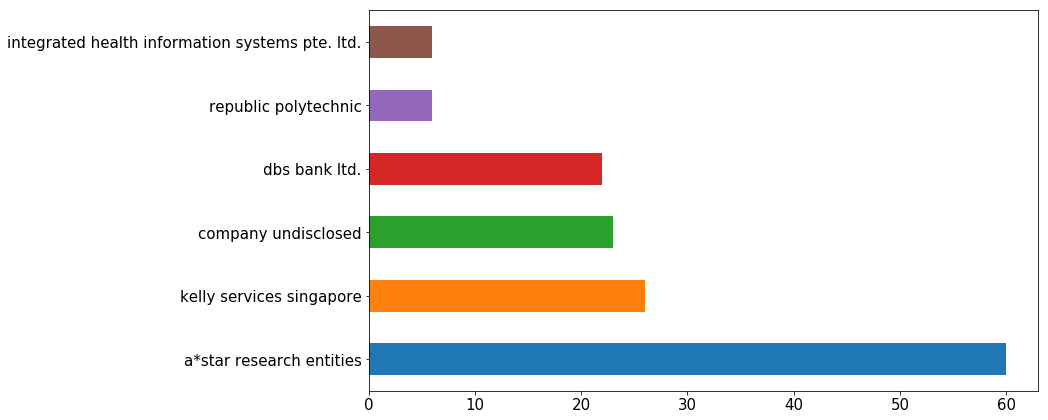

In [75]:
plt.figure(figsize=(12,7))
#fig,ax=plt.subplots(figsize=(12,7))
df_job_sal.comp_name.value_counts().head(6).plot(kind='barh')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [76]:
df_job_sal.country_code.value_counts()

SG    458
ID     74
Name: country_code, dtype: int64

(array([  0., 100., 200., 300., 400., 500.]),
 <a list of 6 Text yticklabel objects>)

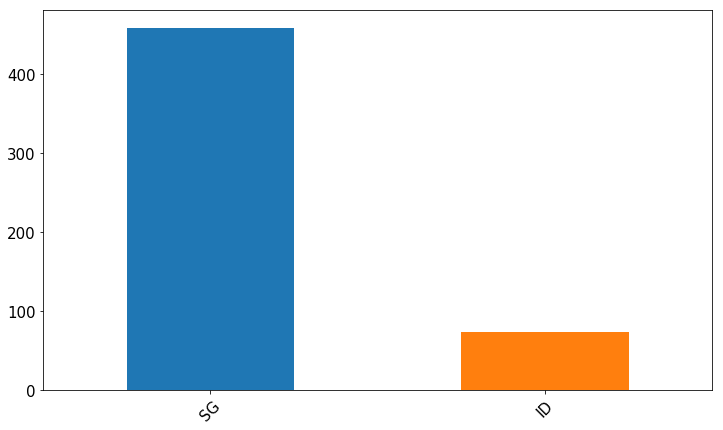

In [77]:
plt.figure(figsize=(12,7))
df_job_sal.country_code.value_counts().plot(kind='bar')
#plt.setp(xticks,rotation=90)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)


In [78]:
df_job_sal=df_job_sal[df_job_sal.job_max_salary>1999]

In [79]:
df_job_sal.reset_index(inplace=True,drop=True)

In [80]:
df_job_sal.job_min_salary.loc[78]=4000

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
df_job_sal=df_job_sal[df_job_sal.job_min_salary!=1234]

In [82]:
df_job_sal.reset_index(inplace=True,drop=True)

In [83]:
df_job_sal.job_sal_mode.map(lambda x: 'monthly' if x=='MONTH' else('annually' if x == 'YEAR' else x)).value_counts()

monthly     501
annually     12
Name: job_sal_mode, dtype: int64

In [84]:
df_job_sal['job_sal_mode']=df_job_sal.job_sal_mode.map(lambda x: 'monthly' if x=='MONTH' else('annually' if x == 'YEAR' else x))

In [85]:
for ind in df_job_sal.index:
    if 'perm' in df_job_sal['job_type'][ind].lower():
        df_job_sal['job_type'][ind]='full_time'
    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
for ind in df_job_sal.index:
    if 'part' in df_job_sal['job_type'][ind].lower():
        df_job_sal['job_type'][ind]='part_time'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
df_job_sal['job_type'].loc[275]='full_time'

In [88]:
for ind in df_job_sal.index:
    if 'full' in df_job_sal['job_type'][ind].lower():
        df_job_sal['job_type'][ind]='full_time'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
for ind in df_job_sal.index:
    if 'contract' in df_job_sal['job_type'][ind].lower():
        df_job_sal['job_type'][ind]='part_time'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


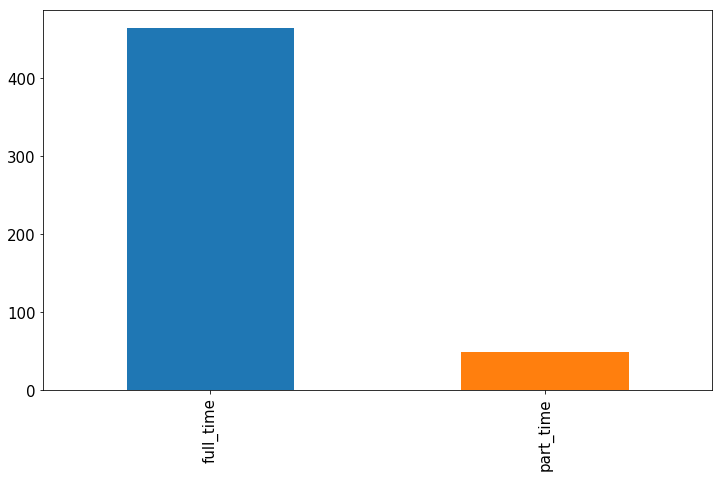

In [90]:
plt.figure(figsize=(12,7))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
df_job_sal['job_type'].value_counts().plot(kind='bar')

In [91]:
df_job_sal.sal_currency_code.value_counts()

SGD    447
IDR     64
USD      1
HKD      1
Name: sal_currency_code, dtype: int64

In [92]:
'''
Quick Conversions from Indonesian Rupiah to Singapore Dollar : 1 IDR = 0.00009 SGD
1 Hong Kong Dollar equals 0.18 Singapore Dollar
1 United States Dollar equals 1.38 Singapore Dollar
'''

'\nQuick Conversions from Indonesian Rupiah to Singapore Dollar : 1 IDR = 0.00009 SGD\n1 Hong Kong Dollar equals 0.18 Singapore Dollar\n1 United States Dollar equals 1.38 Singapore Dollar\n'

In [93]:
df_job_sal[df_job_sal.sal_currency_code=='USD']

,comp_name,comp_tagline,country_code,job_category,job_max_salary,job_min_salary,job_sal_mode,job_seniority,job_title,job_type,min_year_exp,sal_currency_code,skills_future,job_description_concat,comp_tagline_tags,job_category_tags,job_seniority_tags,skills_future_tags,job_description_concat_tags
183,Sourcemind FZ LLC,Talent for the future - Delivered Today,SG,"[environment, technology]",5000.0,3500.0,monthly,[],data engineers,full_time,0,USD,"[building, business, data, digital, learning, ...",We are looking to hire a team of passionate “D...,39,2,0,13,822


In [94]:
df_job_sal['job_max_salary'].loc[183]=df_job_sal['job_max_salary'].loc[183]*1.38
df_job_sal['job_min_salary'].loc[183]=df_job_sal['job_min_salary'].loc[183]*1.38

In [95]:
df_job_sal[df_job_sal.sal_currency_code=='HKD']

,comp_name,comp_tagline,country_code,job_category,job_max_salary,job_min_salary,job_sal_mode,job_seniority,job_title,job_type,min_year_exp,sal_currency_code,skills_future,job_description_concat,comp_tagline_tags,job_category_tags,job_seniority_tags,skills_future_tags,job_description_concat_tags
104,Keyteo,"We are a Belgium IT Consulting firm, present i...",SG,"[design, engineering, services]",80000.0,30000.0,monthly,[],data engineer (infrastructure - machine learni...,full_time,3,HKD,"[automation, building, data, design, distribut...",Our ideal candidate will be a technically prof...,251,3,0,12,884


In [96]:
df_job_sal['job_max_salary'].loc[104]=df_job_sal['job_max_salary'].loc[104]*0.18
df_job_sal['job_min_salary'].loc[104]=df_job_sal['job_min_salary'].loc[104]*0.18

In [97]:
df_job_sal[(df_job_sal.sal_currency_code=='IDR')&(df_job_sal.job_sal_mode=='monthly')]

,comp_name,comp_tagline,country_code,job_category,job_max_salary,job_min_salary,job_sal_mode,job_seniority,job_title,job_type,min_year_exp,sal_currency_code,skills_future,job_description_concat,comp_tagline_tags,job_category_tags,job_seniority_tags,skills_future_tags,job_description_concat_tags
73,Volantis Technology,We build supercluster of billions data to answ...,ID,"[architecture, design, management]",15000000.0,12000000.0,monthly,"[fresh, management]",data engineer,full_time,1,IDR,"[analysis, analytics, architecture, building, ...",About You:The ideal candidate for The Data Eng...,140,3,2,26,2417
74,Volantis Technology,We build supercluster of billions data to answ...,ID,"[design, environment, general]",12000000.0,5000000.0,monthly,[manager],data science consultant,full_time,1,IDR,"[analysis, analytics, automation, based, busin...",About you:You have a gift for taking unstructu...,140,3,1,23,2325
75,Taralite,Financial Company,ID,[],31000000.0,12000000.0,monthly,[],data engineer,full_time,1,IDR,"[data, experience, graduate, new, python, quan...","Job Description:Assist to create fast, accurat...",17,0,0,10,493
80,ilmuOne Data,We are an independent data analytics consultancy,ID,[design],7500000.0,5500000.0,monthly,[junior],junior data scientist,full_time,0,IDR,"[acquisition, analytics, business, customer, d...",Work Responsibilities:Develop and maintain cli...,48,1,1,16,1259
81,ilmuOne Data,We are an independent data analytics consultancy,ID,"[architecture, events, general, technology]",7000000.0,5000000.0,monthly,[level],data analytics - mobile apps developer,full_time,0,IDR,"[analysis, architecture, command, data, develo...",Work Responsibilities:Ensure and improve perfo...,48,4,1,23,1697
82,ilmuOne Data,We are an independent data analytics consultancy,ID,[design],6000000.0,4000000.0,monthly,[junior],junior data analyst,full_time,0,IDR,"[acquisition, analytics, business, customer, d...",Work Responsibilities:Develop and maintain cli...,48,1,1,13,1087
83,Taralite,Financial Company,ID,[marketing],84000000.0,42000000.0,monthly,[senior],senior of data scientist,full_time,3,IDR,"[building, business, computer, data, databases...",Job Description:Work with stakeholders through...,17,1,1,15,844
84,Ice House,We are a global software development agency of...,ID,"[information, services]",25000000.0,15000000.0,monthly,[],data analyst,full_time,3,IDR,"[analysis, analytics, business, data, experien...",We are looking for someone who loves numbers a...,145,2,0,15,1939
85,PT In Fashion,PT In Fashion is Bali's first Lean knitting f...,ID,[],3000000.0,2500000.0,monthly,[level],data entry,full_time,1,IDR,"[database, experience, team, work]",PT In Fashion is urgently looking for someone ...,145,0,1,4,758
86,AdIns,To become a blessing for the society through t...,ID,[information],12000000.0,8000000.0,monthly,[],team leader data scientist,full_time,3,IDR,"[analysis, building, data, detection, experien...","Responsibilities:Selecting features, building ...",94,1,0,13,948


In [98]:
for ind in df_job_sal[df_job_sal.sal_currency_code=='IDR'].index:
    df_job_sal['job_max_salary'].loc[ind]=df_job_sal['job_max_salary'].loc[ind]*0.00009
    df_job_sal['job_min_salary'].loc[ind]=df_job_sal['job_min_salary'].loc[ind]*0.00009

In [99]:
df_job_sal.sal_currency_code='SGD'

In [100]:
df_job_sal=df_job_sal[~((df_job_sal.job_sal_mode=='annually')&(df_job_sal.country_code=='ID'))]

In [101]:
df_job_sal.reset_index(drop=True,inplace=True)

In [102]:
df_job_sal.job_sal_mode.loc[129]='monthly'

In [103]:
df_job_sal.job_max_salary.loc[440]=7000

In [104]:
df_job_sal.job_sal_mode.loc[483]='annually'

In [105]:
df_job_sal[(df_job_sal.job_sal_mode=='annually')]

,comp_name,comp_tagline,country_code,job_category,job_max_salary,job_min_salary,job_sal_mode,job_seniority,job_title,job_type,min_year_exp,sal_currency_code,skills_future,job_description_concat,comp_tagline_tags,job_category_tags,job_seniority_tags,skills_future_tags,job_description_concat_tags
77,Kpler,Kpler is an intelligence company providing tra...,SG,[engineering],45000.0,35000.0,annually,[],data engineer,full_time,0,SGD,"[algorithms, applications, business, culture, ...",About the roleYou will participate in the evol...,104,1,0,14,1469
216,talend singapore pte. ltd.,"[ability, advantage, age, analytics, applicati...",SG,marketing / public relations,57900.0,42100.0,annually,executive,marketing operations specialist,full_time,None,SGD,"['marketing', 'marketing strategy', 'managemen...",['associate marketing operations analyst\xa0\n...,57,29,9,374,3654
277,ubs ag,"[ability, accurate, analytics, career, change,...",SG,banking and finance,130000.0,60000.0,annually,professional,financial crime prevention data analyst,full_time,None,SGD,"['financial modeling', 'analysis', 'management...","['your role :', ""do you have sharp analytic sk...",20,19,12,356,1982
371,national university of singapore,"[analytics, applicant, application, asia, busi...",SG,education and training,126000.0,84000.0,annually,professional,"senior lecturer, university",full_time,None,SGD,"['research', 'lecturing', 'teaching', 'science...",['the department of communications and new med...,38,22,12,327,4076
372,national university of singapore,"[advantage, analytics, applicant, application,...",SG,education and training,99000.0,66000.0,annually,professional,"lecturer, university",full_time,None,SGD,"['research', 'lecturing', 'teaching', 'science...",['the department of communications and new med...,36,22,12,327,3880
373,national university of singapore,"[analytics, applicant, asia, business, communi...",SG,education and training,75000.0,50000.0,annually,professional,academic instructor,full_time,None,SGD,"['research', 'lecturing', 'teaching', 'science...",['the department of communications and new med...,36,22,12,327,3688
384,ubs ag,"[ability, achieve, analytics, application, aut...",SG,banking and finance,145000.0,85000.0,annually,senior executive,data analyst - automation enablement,full_time,None,SGD,"['automation', 'plc', 'engineering', 'scada', ...",['do you have a knack of intersecting the data...,35,19,16,345,2554
398,talend singapore pte. ltd.,"[ability, advantage, analytics, application, b...",SG,information technology,111100.0,80800.0,annually,senior executive,senior consultant (big data),full_time,None,SGD,"['troubleshooting', 'networking', 'cisco techn...",['talend is a rapidly growing leader in the cl...,50,22,16,318,3016
399,talend singapore pte. ltd.,"[ability, additional, advantage, age, analytic...",SG,sales / retail,250000.0,140000.0,annually,executive,strategic account executive,full_time,None,SGD,"['sales', 'marketing', 'account management', '...",['strategic account executive (malaysia)\n \xa...,69,15,9,386,5239
401,teralytics pte. ltd.,"[analytics, automation, code, companies, compa...",SG,engineering,150000.0,90000.0,annually,professional,junior site reliability engineer,full_time,None,SGD,"['integration', 'linux', 'virtualization', 'pr...","['are you a passionate linux system engineer, ...",37,11,12,304,2147


In [106]:
for ind in df_job_sal[(df_job_sal.job_sal_mode=='annually')].index:
    df_job_sal.job_max_salary.loc[ind]=float(df_job_sal.job_max_salary.loc[ind])/12.0
    df_job_sal.job_min_salary.loc[ind]=float(df_job_sal.job_min_salary.loc[ind])/12.0
    #df_job_sal.job_max_salary=df_job_sal.job_max_salary*12

In [107]:
df_job_sal.job_sal_mode='monthly'

In [108]:
df_job_sal.drop(['job_sal_mode','sal_currency_code'],axis=1,inplace=True)

In [109]:
df_job_sal.drop('comp_name',axis=1,inplace=True)

In [112]:
df_job_sal['job_avg_salary']=(df_job_sal.job_max_salary+df_job_sal.job_min_salary)/2

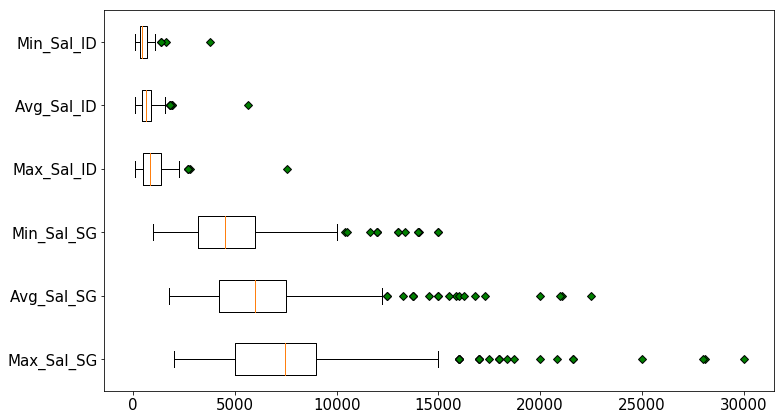

In [113]:
#plt.Figure(figsize=(120,100))
data=[df_job_sal[df_job_sal.country_code=='SG'].job_max_salary,df_job_sal[df_job_sal.country_code=='SG'].job_avg_salary,df_job_sal[df_job_sal.country_code=='SG'].job_min_salary,
     df_job_sal[df_job_sal.country_code=='ID'].job_max_salary,df_job_sal[df_job_sal.country_code=='ID'].job_avg_salary,df_job_sal[df_job_sal.country_code=='ID'].job_min_salary]

fig1, ax1 = plt.subplots(figsize=(12,7))
#plt.set_title('Max Sal Plot')

ax1.boxplot(data,flierprops=dict(markerfacecolor='g', marker='D'),vert=False)
plt.xticks(fontsize=15)
ax1.set_yticklabels(['Max_Sal_SG','Avg_Sal_SG','Min_Sal_SG','Max_Sal_ID','Avg_Sal_ID','Min_Sal_ID'])
plt.yticks(fontsize=15)
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


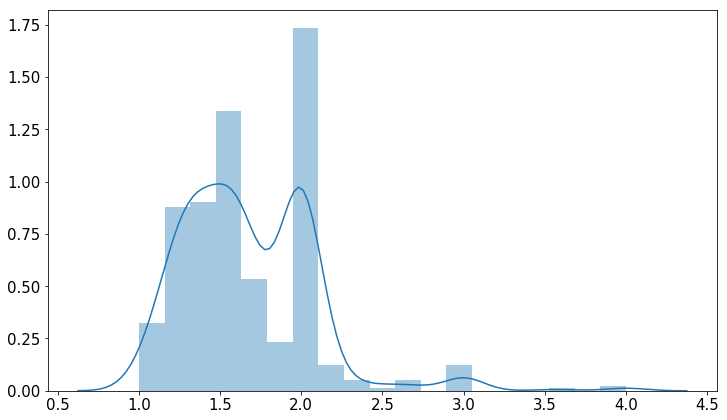

In [114]:
plt.figure(figsize=(12,7))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.distplot(df_job_sal.job_max_salary/df_job_sal.job_min_salary)
plt.show()

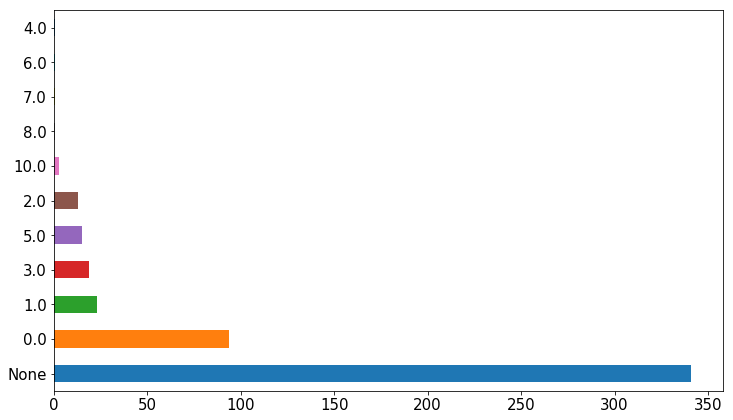

In [115]:
plt.figure(figsize=(12,7))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
df_job_sal.min_year_exp.value_counts().plot(kind='barh')
plt.show()

In [116]:
df_job_sal.min_year_exp.value_counts().keys()

Index(['None', 0.0, 1.0, 3.0, 5.0, 2.0, 10.0, 8.0, 7.0, 6.0, 4.0], dtype='object')

In [117]:
df_job_sal[df_job_sal.min_year_exp==7]['job_avg_salary']

59    6500.0
Name: job_avg_salary, dtype: float64

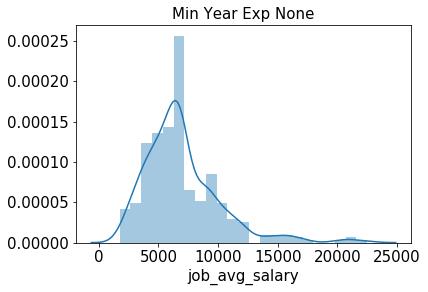

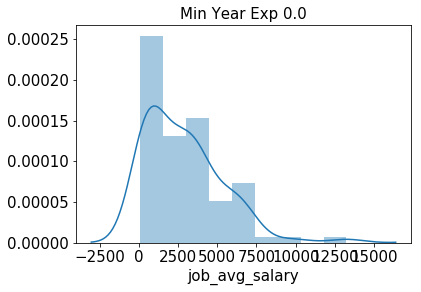

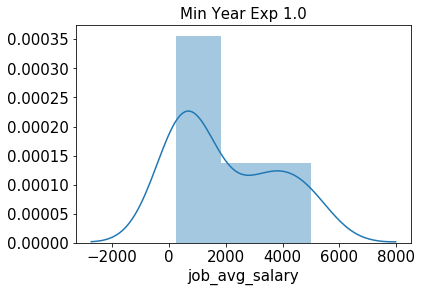

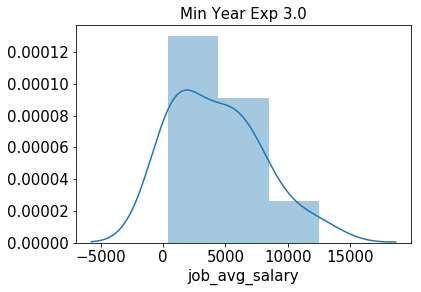

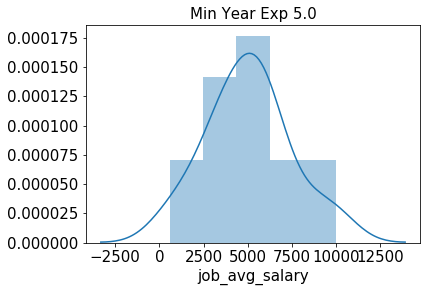

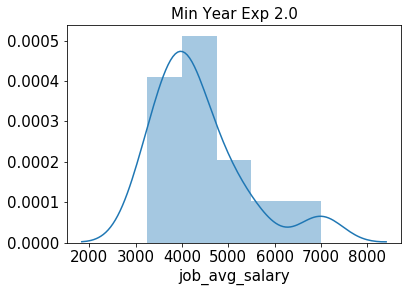

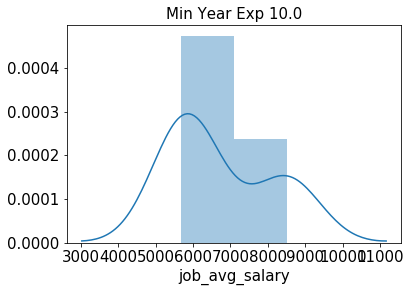

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


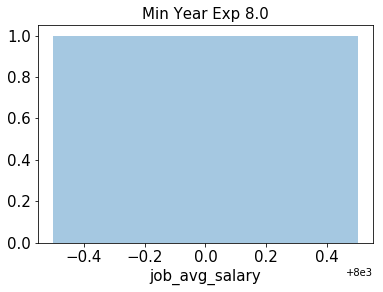

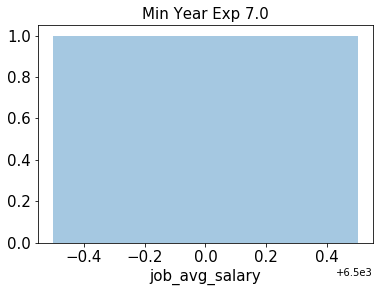

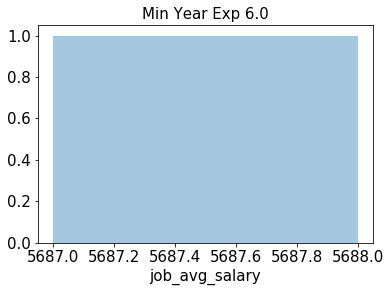

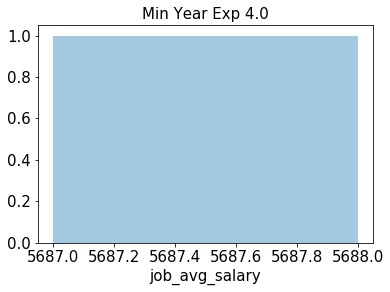

In [118]:

for key in df_job_sal.min_year_exp.value_counts().keys():
    #plt.Figure(figsize=(15,10))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    sns.distplot(df_job_sal[df_job_sal.min_year_exp==key]['job_avg_salary'])
    plt.title('Min Year Exp '+str(key),fontsize=15)
    plt.xlabel('job_avg_salary',fontsize=15)
    #.plot(kind='hist',title='Min Year Exp '+str(key))
    plt.show()

In [119]:
df_job_sal.min_year_exp.value_counts()

None    341
0.0      94
1.0      23
3.0      19
5.0      15
2.0      13
10.0      3
8.0       1
7.0       1
6.0       1
4.0       1
Name: min_year_exp, dtype: int64

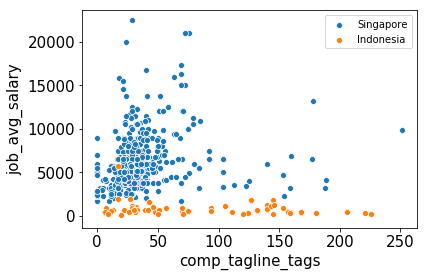

In [120]:
#plt.Figure(figsize=(15,10))
plt.xlabel('comp_tagline_tages',fontsize=15)
plt.ylabel('job_avg_salary',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.scatterplot(df_job_sal[df_job_sal.country_code=='SG'].comp_tagline_tags,df_job_sal[df_job_sal.country_code=='SG'].job_avg_salary)
sns.scatterplot(df_job_sal[df_job_sal.country_code=='ID'].comp_tagline_tags,df_job_sal[df_job_sal.country_code=='ID'].job_avg_salary)
plt.legend(['Singapore','Indonesia'])

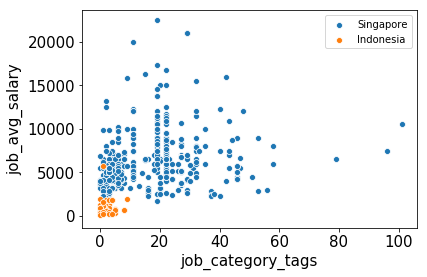

In [121]:
plt.xlabel('comp_tagline_tages',fontsize=15)
plt.ylabel('job_avg_salary',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.scatterplot(df_job_sal[df_job_sal.country_code=='SG'].job_category_tags,df_job_sal[df_job_sal.country_code=='SG'].job_avg_salary)
sns.scatterplot(df_job_sal[df_job_sal.country_code=='ID'].job_category_tags,df_job_sal[df_job_sal.country_code=='ID'].job_avg_salary)
plt.legend(['Singapore','Indonesia'])

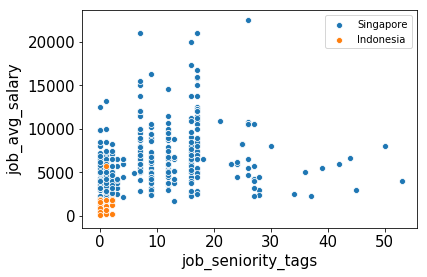

In [122]:
plt.xlabel('comp_tagline_tages',fontsize=15)
plt.ylabel('job_avg_salary',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.scatterplot(df_job_sal[df_job_sal.country_code=='SG'].job_seniority_tags,df_job_sal[df_job_sal.country_code=='SG'].job_avg_salary)
sns.scatterplot(df_job_sal[df_job_sal.country_code=='ID'].job_seniority_tags,df_job_sal[df_job_sal.country_code=='ID'].job_avg_salary)
plt.legend(['Singapore','Indonesia'])

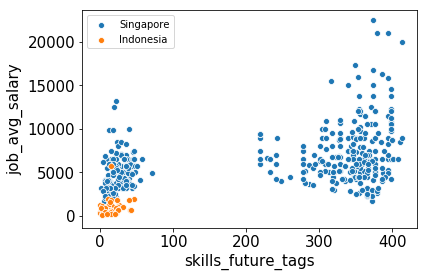

In [123]:
plt.xlabel('comp_tagline_tages',fontsize=15)
plt.ylabel('job_avg_salary',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.scatterplot(df_job_sal[df_job_sal.country_code=='SG'].skills_future_tags,df_job_sal[df_job_sal.country_code=='SG'].job_avg_salary)
sns.scatterplot(df_job_sal[df_job_sal.country_code=='ID'].skills_future_tags,df_job_sal[df_job_sal.country_code=='ID'].job_avg_salary)
plt.legend(['Singapore','Indonesia'])

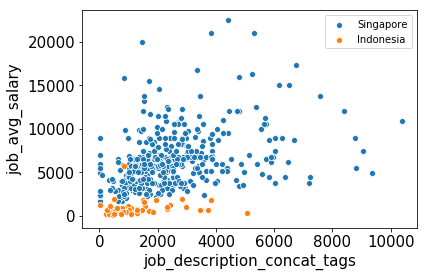

In [124]:
plt.xlabel('comp_tagline_tages',fontsize=15)
plt.ylabel('job_avg_salary',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.scatterplot(df_job_sal[df_job_sal.country_code=='SG'].job_description_concat_tags,df_job_sal[df_job_sal.country_code=='SG'].job_avg_salary)
sns.scatterplot(df_job_sal[df_job_sal.country_code=='ID'].job_description_concat_tags,df_job_sal[df_job_sal.country_code=='ID'].job_avg_salary)
plt.legend(['Singapore','Indonesia'])

In [125]:
df_job_sal.head()

,comp_tagline,country_code,job_category,job_max_salary,job_min_salary,job_seniority,job_title,job_type,min_year_exp,skills_future,job_description_concat,comp_tagline_tags,job_category_tags,job_seniority_tags,skills_future_tags,job_description_concat_tags,job_avg_salary
0,"[ability, accurate, activities, application, b...",SG,"[accounting, environment, management, services]",4000.0,2500.0,[management],credit control specialist,part_time,2,"[account, accounting, accounts, business, comm...",minimum diploma in any field\nminimum two-year...,34,4,1,30,2948,3250.0
1,"[ability, according, advantage, application, b...",SG,"[management, manufacturing, purchasing, servic...",4000.0,2500.0,"[junior, level, management]",junior supply planner,part_time,1,"[building, business, command, communication, c...","working location at central, outside of cbd\n5...",35,7,3,44,2884,3250.0
2,"[asia, business, companies, company, data, exc...",SG,"[information, logistics, management, service, ...",4000.0,2500.0,[management],business analyst,part_time,1,"[business, contract, data, delivery, excel, ex...",my client is a us multinational courier delive...,18,5,1,23,983,3250.0
3,"[ability, advantage, analytics, business, care...",SG,"[education, environment, health, information, ...",6000.0,4000.0,[],advanced data analyst,full_time,None,"[algorithms, analytics, artificial, benefits, ...","company\ncanopy is a ""make sense of your data""...",43,7,0,31,2282,5000.0
4,"[business, data, industry, information, projec...",SG,[information],4000.0,2500.0,[],site engineer,full_time,1,"[act, business, communications, compliance, co...",industry: construction / mnclocation: marine ...,10,1,0,17,1369,3250.0


In [126]:
df_job_sal[df_job_sal.country_code=='SG'].job_avg_salary.describe()

count      448.000000
mean      6446.939360
std       3115.674594
min       1750.000000
25%       4200.000000
50%       6000.000000
75%       7500.000000
max      22500.000000
Name: job_avg_salary, dtype: float64

In [127]:
df_job_sal[df_job_sal.country_code=='ID'].job_avg_salary.describe()

count      64.000000
mean      816.319531
std       773.339561
min        99.000000
25%       424.125000
50%       652.500000
75%       905.625000
max      5670.000000
Name: job_avg_salary, dtype: float64

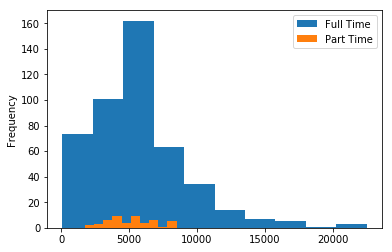

In [128]:
df_job_sal.groupby('job_type')['job_avg_salary'].plot(kind='hist')
plt.legend(['Full Time','Part Time'])

In [ ]:
#df_job_sal.to_csv('job_3_sal_after_cleaning.csv')